### Jesús Miguel Sepúlveda Suárez

In [129]:
# Se cargan las bibliotecas necesarias
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

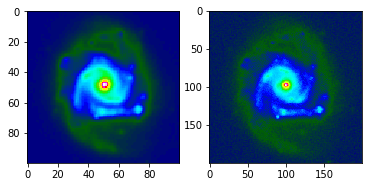

In [130]:
# Se cargan los datos de la galaxia y se muestran
hdul1 = fits.open("/home/miguel/trabajo_galaxias/1_f105w.fits")
hdul2 = fits.open("/home/miguel/trabajo_galaxias/1_f850lp.fits")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6,3))
ax1.imshow(hdul1[0].data, cmap='gist_ncar')
ax2.imshow(hdul2[0].data, cmap='gist_ncar')

([array([0., 1., 1., 3., 3., 3., 2., 2., 0., 0.]),
  array([0., 1., 1., 2., 4., 2., 2., 2., 1., 0.]),
  array([0., 0., 1., 2., 1., 1., 4., 4., 2., 0.]),
  array([1., 0., 1., 1., 1., 6., 3., 0., 2., 0.]),
  array([0., 0., 3., 2., 3., 5., 2., 0., 0., 0.]),
  array([0., 0., 3., 1., 4., 1., 2., 3., 1., 0.]),
  array([0., 0., 1., 3., 2., 2., 5., 2., 0., 0.]),
  array([0., 0., 2., 4., 1., 2., 1., 1., 2., 2.]),
  array([0., 1., 1., 3., 1., 1., 3., 4., 1., 0.]),
  array([0., 0., 0., 0., 5., 1., 6., 1., 1., 1.]),
  array([0., 0., 2., 0., 1., 3., 6., 2., 1., 0.]),
  array([1., 0., 0., 2., 3., 4., 2., 3., 0., 0.]),
  array([1., 1., 0., 1., 3., 0., 7., 1., 1., 0.]),
  array([0., 0., 2., 2., 1., 5., 1., 2., 2., 0.]),
  array([0., 1., 1., 3., 2., 4., 3., 1., 0., 0.])],
 array([-8.1702574e-06, -6.4226956e-06, -4.6751338e-06, -2.9275718e-06,
        -1.1800099e-06,  5.6755198e-07,  2.3151138e-06,  4.0626755e-06,
         5.8102378e-06,  7.5577996e-06,  9.3053613e-06], dtype=float32),
 <a list of 15 Li

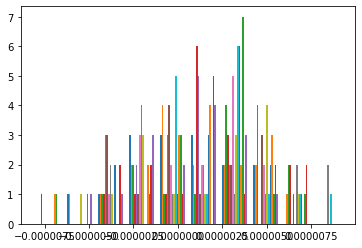

In [131]:
# Se hace un histograma para observar cual es el brillo maximo del ruido y poder quitarlo
dato_L_2 = hdul2[0].data[:,:]
dato_L_2 = dato_L_2/dato_L_2.sum()
espacio = dato_L_2[0:15,0:15]
plt.hist(espacio)

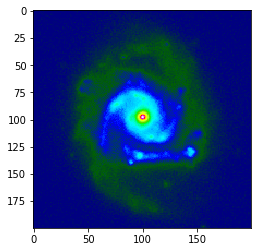

In [132]:
# Se quita el ruido igualandolo a cero y se grafica
for i in np.arange(dato_L_2.shape[0]):
    for j in np.arange(dato_L_2.shape[1]):
        dato_L_1 = np.zeros(dato_L_2.shape)
        if dato_L_2[i,j] <= 5.6755198e-07:
            dato_L_2[i,j] = 0
            
plt.imshow(dato_L_2, cmap='gist_ncar')

### Modelo ajustado por elipses

La exponencial es de la forma: 

$\delta = \delta_0 e^{\sqrt{\frac{(x-x_0)^2}{a^2} + \frac{(y-y_0)^2}{b^2}}/h} $
con $h_1 = (ah)^2$ y $h_2= (bh)^2$.

In [133]:
# Modelo de la exponencial
def Func_expo(param,image): 
    x0 = param[0] 
    y0 = param[1] 
    delta = param[2]  
    h1 = param[3] 
    h2 = param[4]
    expo = np.zeros(image.size)   
    x = np.arange(image.shape[0])  
    y = np.arange(image.shape[1]) 
    xx,yy = np.meshgrid(x,y)      
    expo = delta*np.exp(-(np.sqrt((xx-x0)**2/h1 + (yy-y0)**2/h2)))
    return expo
# funcion error
def ErrorFunc2(param,image):
    expo = Func_expo(param,image) 
    chi = np.ravel((image-expo))
    return chi

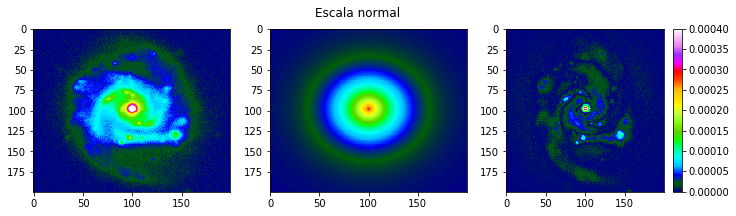

In [134]:
# Puntos inciales
x0  = dato_L_2.shape[0]/2
y0  = dato_L_2.shape[1]/2
L   = dato_L_2.max()
h1  = 20
h2  = 20
tupla = [x0,y0,L,h1,h2] 
best_params2,success = leastsq(ErrorFunc2, tupla, args = (dato_L_2)) 
mejo = Func_expo(best_params2,dato_L_2)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3))
fig.suptitle('Escala normal')

plt.subplot(1, 3, 1)
plt.imshow(dato_L_2, vmin=0, vmax=0.0004, cmap='gist_ncar', aspect='auto')
plt.subplot(1, 3, 2)
plt.imshow(mejo, vmin=0, vmax=0.0004, cmap='gist_ncar', aspect='auto')
plt.subplot(1, 3, 3)
plt.imshow(np.abs(dato_L_2 - mejo), vmin=0, vmax=0.0004, cmap='gist_ncar', aspect='auto')
plt.colorbar()

/home/miguel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/home/miguel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


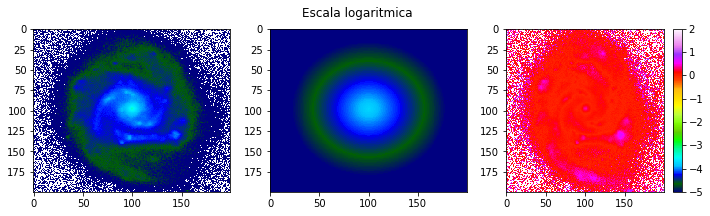

In [135]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3))
fig.suptitle('Escala logaritmica')

plt.subplot(1, 3, 1)
plt.imshow(np.log10(dato_L_2), vmin=-5, vmax=3, cmap='gist_ncar', aspect='auto')
plt.subplot(1, 3, 2)
plt.imshow(np.log10(mejo), vmin=-5, vmax=3, cmap='gist_ncar', aspect='auto')
plt.subplot(1, 3, 3)
plt.imshow(np.abs(np.log10(dato_L_2) - np.log10(mejo)), vmin=-5, vmax=2, cmap='gist_ncar', aspect='auto')
plt.colorbar()

### Para obtener el angulo de inclinacion de la galaxia usamos la siguiente ecuacion
$cos(i) = \frac{a}{b} = \sqrt{h_1/h_2}$

In [136]:
cos_i = np.sqrt(best_params2[3]/best_params2[4])
i = np.arccos(cos_i)
print("El angulo de inclinacion es:", i*180/np.pi)
print("El coseno del angulo es:", cos_i)

El angulo de inclinacion es: 16.207397210756753
El coseno del angulo es: 0.960257658336479


In [137]:
best_params2

array([9.97221187e+01, 9.78689235e+01, 2.91383516e-04, 5.51199194e+02,
       5.97768485e+02])

### Ajuste de parametros

In [138]:
def Func_expo1(param,image): 
    x0 = param[0] 
    y0 = param[1] 
    delta = param[2]  
    h = param[3]
    expo = np.zeros(image.size)   
    x = np.arange(image.shape[0])  
    y = np.arange(image.shape[1]) 
    xx,yy = np.meshgrid(x,y) 
    #Se usa el coseno del angulo 0.96
    expo = delta*np.exp(-(np.sqrt((xx-x0)**2/0.96**2 + (yy-y0)**2))/h)
    return expo

def ErrorFunc3(param,image):
    expo = Func_expo1(param,image) 
    chi = np.ravel((image-expo))
    return chi

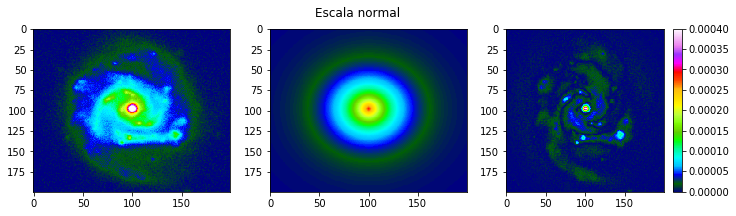

In [139]:
x0  = dato_L_2.shape[0]/2
y0  = dato_L_2.shape[1]/2
L   = dato_L_2.max()
h   = 1
tupla1 = [x0,y0,L,h] 
best_params3,success = leastsq(ErrorFunc3, tupla1, args = (dato_L_2)) 
mejo1 = Func_expo1(best_params3,dato_L_2)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3))
fig.suptitle('Escala normal')

plt.subplot(1, 3, 1)
plt.imshow(dato_L_2, vmin=0, vmax=0.0004, cmap='gist_ncar', aspect='auto')
plt.subplot(1, 3, 2)
plt.imshow(mejo1, vmin=0, vmax=0.0004, cmap='gist_ncar', aspect='auto')
plt.subplot(1, 3, 3)
plt.imshow(np.abs(dato_L_2 - mejo1), vmin=0, vmax=0.0004, cmap='gist_ncar', aspect='auto')
plt.colorbar()

In [140]:
best_params3

array([9.97226312e+01, 9.78679370e+01, 2.91381473e-04, 2.44527597e+01])

### modelo viendose de frente

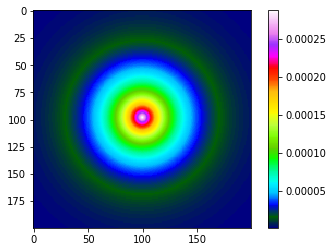

In [141]:
def Func_expo2(param,image): 
    x0 = param[0] 
    y0 = param[1] 
    delta = param[2]  
    h = param[3]
    expo = np.zeros(image.size)   
    x = np.arange(image.shape[0])  
    y = np.arange(image.shape[1]) 
    xx,yy = np.meshgrid(x,y)      
    expo = delta*np.exp(-(np.sqrt((xx-x0)**2 + (yy-y0)**2))/h)
    return expo
model = Func_expo2(best_params3,dato_L_2)
plt.imshow(model, cmap='gist_ncar')
plt.colorbar()

### Unidades del modelo
### Luminosidad
$L_{total} = 10^{10} L_0$

In [149]:
model = model/model.sum()*10**10
model.sum()

10000000000.0

### Masa
$1 L_0 \rightarrow 1M_0$

In [148]:
model.sum()

10000000000.0

### Densidad de brillo superficial
$200 \text{pxl} = 30000 \text{pc} \:\: \rightarrow \:\: 1 \text{pxl} = \frac{30000}{200} = 150 \text{pc}$

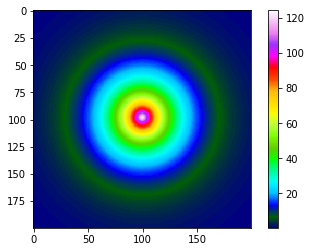

In [147]:
model1 = model/150**2
plt.imshow(model1, cmap='gist_ncar')
plt.colorbar()

In [150]:
model1

array([[0.41555857, 0.42783551, 0.44041093, ..., 0.44610739, 0.43339777,
        0.42098843],
       [0.42760215, 0.44029964, 0.45330844, ..., 0.45920206, 0.44605327,
        0.4332177 ],
       [0.43992819, 0.45305864, 0.4665137 , ..., 0.4726104 , 0.45900931,
        0.44573489],
       ...,
       [0.40073279, 0.41249547, 0.4245411 , ..., 0.42999659, 0.41782377,
        0.40593557],
       [0.38931579, 0.40068508, 0.41232557, ..., 0.41759681, 0.40583445,
        0.39434484],
       [0.37816957, 0.38915704, 0.40040442, ..., 0.40549693, 0.39413279,
        0.38302999]])